### Explaination:
> Please makesure running the UCI_HeartDisease.ipynb first to generate the preprocess csv file.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('process_heart.csv')

In [33]:
df.shape

(303, 27)

In [34]:
X = df.drop('target', axis=1)
y = df['target']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [37]:
model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=5)

In [38]:
# show the number 7 decision tree.
model.estimators_[7]

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=2059200585)

In [39]:
# feature_names = X_train.columns
y_train_Str = y_train.map({0: 'no diseas', 1: 'disease'})
y_train_Str = y_train_Str.values

In [9]:
# visualization the number 7 decision tree
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [40]:
export_graphviz(model.estimators_[7], out_file='tree.dot', feature_names=X_train.columns, class_names=y_train_Str, 
                rounded=True, proportion=True, label='root', precision=2, filled=True)

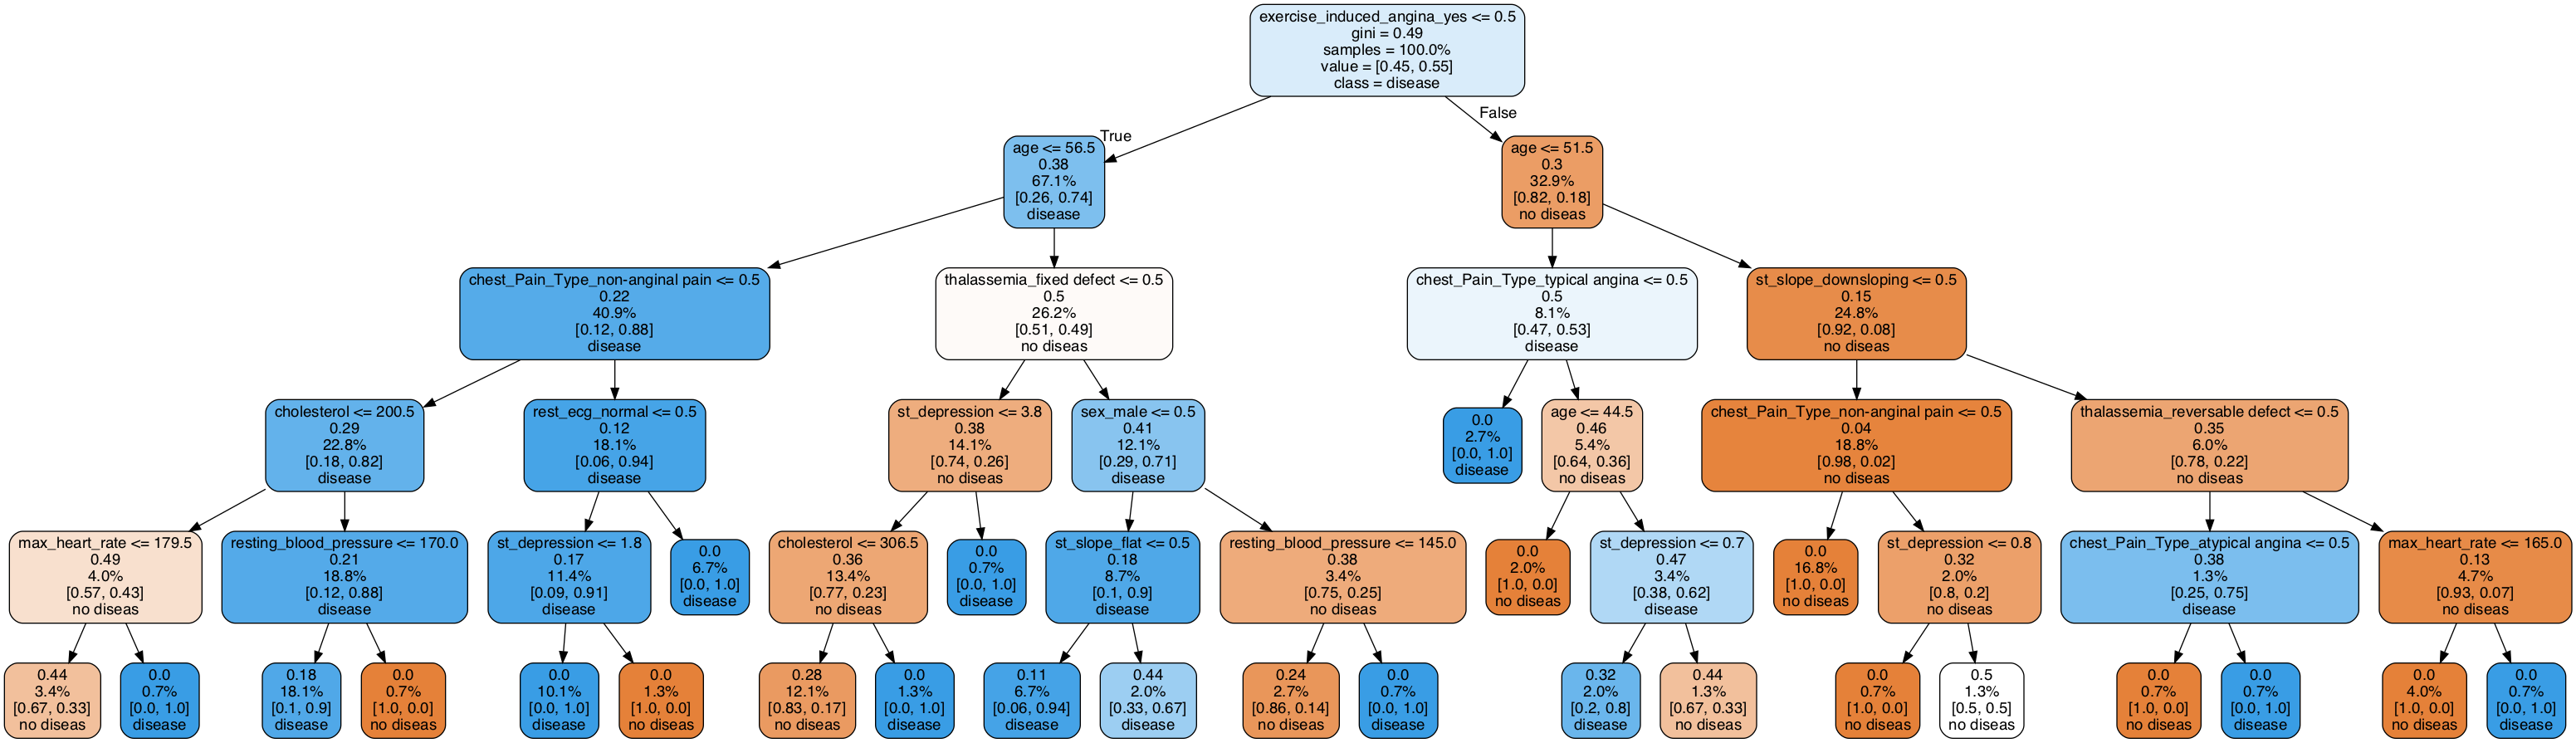

In [41]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])
Image(filename='tree.png')

In [42]:
model.estimators_[7].feature_importances_

array([0.20801666, 0.03100955, 0.05481899, 0.02833637, 0.08667172,
       0.        , 0.        , 0.05224196, 0.        , 0.01622901,
       0.01103876, 0.03294611, 0.        , 0.        , 0.        ,
       0.        , 0.00184421, 0.        , 0.36897858, 0.01112846,
       0.00415802, 0.        , 0.06158333, 0.        , 0.03099827,
       0.        ])

In [43]:
indeces = model.feature_importances_.argsort()[::-1]
indeces

array([11,  5,  3,  4, 22,  0, 24,  1,  2, 18, 17, 19,  6, 20, 10,  7, 16,
        8, 14,  9, 13, 12, 23, 21, 25, 15])

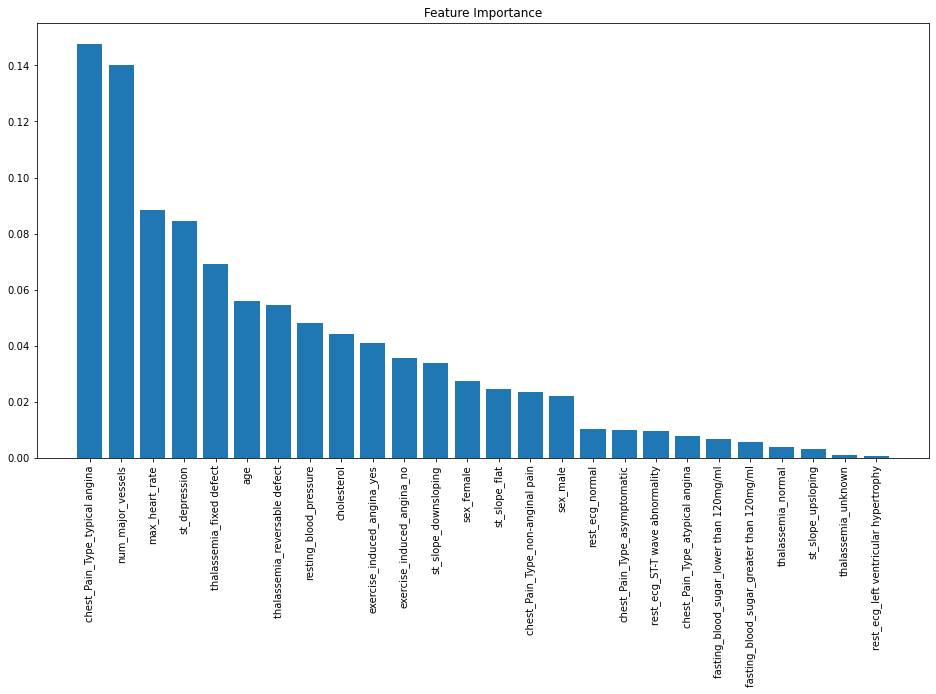

In [44]:
plt.figure(figsize=(16, 8))
plt.title('Feature Importance')
plt.bar(range(len(X.columns)), model.feature_importances_[indeces])
plt.xticks(range(len(X.columns)), X.columns[indeces], rotation=90)
plt.show()

### Assessment

In [45]:
X_test.shape

(61, 26)

In [46]:
X_test.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,num_major_vessels,sex_female,sex_male,chest_Pain_Type_asymptomatic,chest_Pain_Type_atypical angina,...,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
246,56,134,409,150,1.9,2,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
183,58,112,230,165,2.5,1,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
229,64,125,309,131,1.8,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
126,47,112,204,143,0.1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
184,50,150,243,128,2.6,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


In [70]:
# 定性预测
pred = model.predict(X_test)
# 定量预测
prob = model.predict_proba(X_test)[:,1]

In [72]:
pd.crosstab(y_test, pred)

col_0,0,1
target,,
0,26,9
1,4,22


- Accuracy

In [76]:
sum(np.array(pred) == np.array(y_test))/ len(pred)

0.7868852459016393

- Confusion Matrix

In [77]:
import seaborn as sns

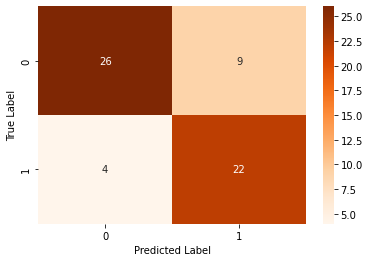

In [81]:
sns.heatmap(pd.crosstab(y_test, pred), annot=True, cmap=plt.cm.Oranges)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- ROC curve

In [82]:
from sklearn.metrics import roc_curve, auc

In [83]:
fpr, tpr, threshold = roc_curve(y_test, prob)

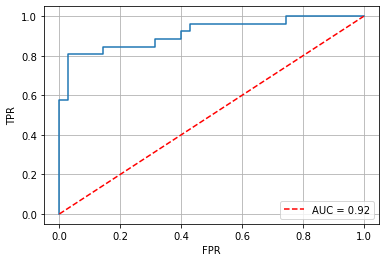

In [88]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--r', label='AUC = %.2f' % auc(fpr, tpr))
plt.legend(loc='lower right')
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()